Subset of cities between long/lat parameters:
Elbasan
Vienna
Brest
Mazyr
Plovdiv
Burgas
Pleven
Ruse
Stara Zagora
Split
Brno
Ostrava
Tartu
Tallinn
Budapest
Debrecen
Gyor
Szeged
Bari
Foggia
Daugavpils
Riga
Vilnius
Skopje
Balti
Chisinau
Podgorica
Bialystok
Elblag
Kielce
Koszalin
Poznan
Wroclaw
Warsaw
Botosani
Braila
Bucharest
Craiova
Sibiu
Constanta
Belgrade
Bratislava
Kosice
MalmÃ¶
Uppsala
Bursa
Edirne
Tekirdag
Rivne
Kiev
Zhytomyr
Most frequent countries between long/lat parameters:
0    Poland
dtype: object


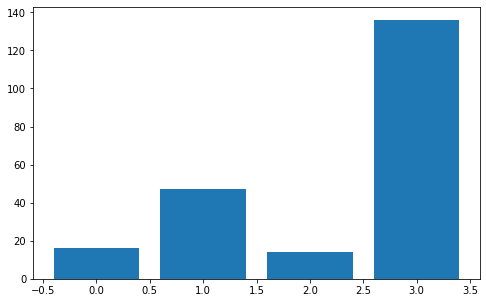

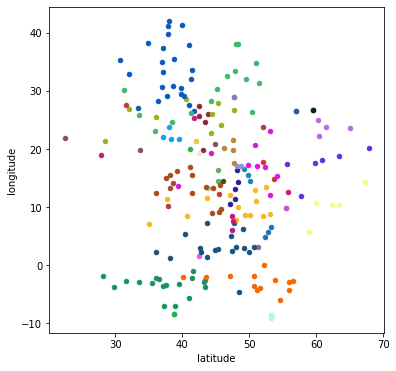

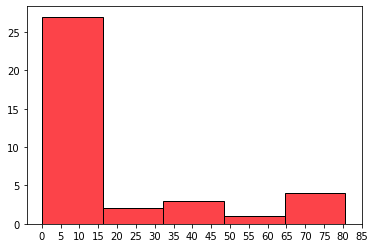

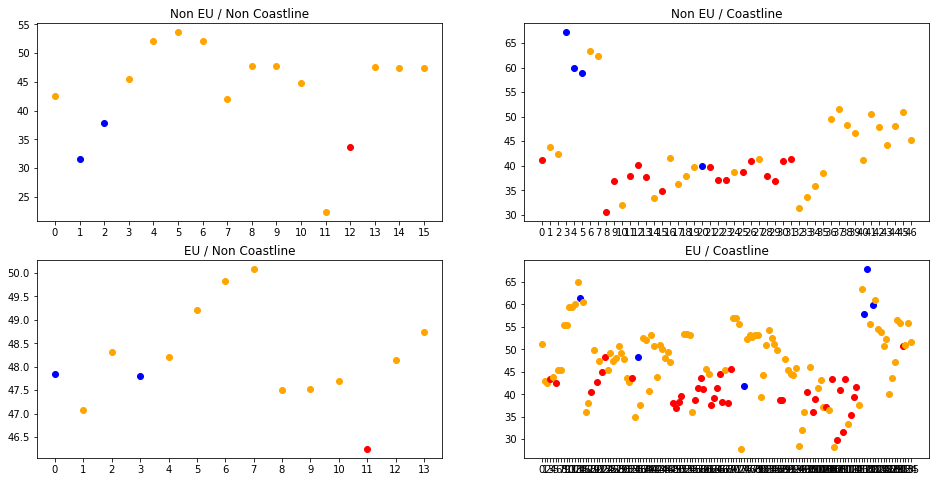

In [4]:
import pandas as pd
import csv
from random import randint
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
with open('EuCitiesTemperatures.csv') as file:
    
    average = 0
    count = 0
    countrylist = []
    mycitylist = []
    color = []
    mybarchartlist = [0,0,0,0] #data no matter what will have four variations of region/coastline
    
    df = pd.read_csv ("EuCitiesTemperatures.csv")

    #change latitude NaNs to average of country latitude values
    df['latitude'] = df['latitude'].fillna(0) # replace NaN with 0s for manipulation
    for index, row in df.iterrows():
        count = 0
        average = 0
        if df.at[index, 'latitude'] == 0:
            thecountry = df.at[index, 'country']
    
            for index2, row in df.iterrows():
                if df.at[index2, 'country'] == thecountry and index2 != index:
                    average += df.at[index2, 'latitude']
                    count += 1
                    
            df.at[index, 'latitude'] = round((average/count), 2)
          
    #change longitude NaNs to average of country longitude values
    df['longitude'] = df['longitude'].fillna(0) 
    for index, row in df.iterrows():
        count = 0
        average = 0
        if df.at[index, 'longitude'] == 0:
            thecountry = df.at[index, 'country']
    
            for index2, row in df.iterrows():
                if df.at[index2, 'country'] == thecountry and index2 != index:
                    average += df.at[index2, 'longitude']
                    count += 1
                    
            df.at[index, 'longitude'] = round((average/count), 2)
    
    #print cities that are inbetween certain long/lat bounds, which country(s) have most num of cities in this band
    print("Subset of cities between long/lat parameters:")
    for index, row in df.iterrows():
        if df.at[index, 'latitude'] >= 40 and df.at[index, 'latitude'] <= 60:
            if df.at[index, 'longitude'] >= 15 and df.at[index, 'longitude'] <= 30:
                
                countryofinterest = df.at[index, 'country']
                print(df.at[index, 'city'])
                mycitylist.append(countryofinterest)
        
    dfcountries = pd.DataFrame(mycitylist, columns= ['countries'])
    print("Most frequent countries between long/lat parameters:")
    print(dfcountries.countries.mode())

    #fill missing temperature with average of similar region type
    df['temperature'] = df['temperature'].fillna(0)
    for index, row in df.iterrows():
        count = 0
        average = 0
        if df.at[index, 'temperature'] == 0:
            region = df.at[index, 'EU']
            coastal = df.at[index, 'coastline']
    
            for index2, row in df.iterrows():
                if df.at[index2, 'EU'] == region and df.at[index2, 'coastline'] == coastal and index2 != index:
                    average += df.at[index2, 'temperature']
                    count += 1
                    
            df.at[index, 'temperature'] = round((average/count), 2)
      
    #beginning bar list grabbing number of possible regions
    for index, row in df.iterrows():
        if df.at[index, 'EU'] == 'no' and df.at[index, 'coastline'] == 'no':
            mybarchartlist[0] += 1
        elif df.at[index, 'EU'] == 'no' and df.at[index, 'coastline'] == 'yes':
            mybarchartlist[1] += 1
        elif df.at[index, 'EU'] == 'yes' and df.at[index, 'coastline'] == 'no':
            mybarchartlist[2] += 1
        elif df.at[index, 'EU'] == 'yes' and df.at[index, 'coastline'] == 'yes':
            mybarchartlist[3] += 1
            
    #create bar list
    plt.figure(figsize=(8,5))
    plt.bar(range(len(mybarchartlist)), mybarchartlist)
    plt.show()
    
    #dictionary of country and color for scatter plot
    mycountrylist = df.country.unique()
    for i in range(len(mycountrylist)):
        color.append('#%06X' % randint(0, 0xFFFFFF))    
    colordict = {mycountrylist[i]: color[i] for i in range(len(mycountrylist))}

    #plot scatter 
    fig, ax = plt.subplots(figsize=(6,6))
    grouped = df.groupby('country')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='latitude',y='longitude',color=colordict[key])    
    plt.show()
    
    #begin histogram
    mypopulationlist = df.population.unique()
    mypopulationlist = (list(mypopulationlist))

    max_score = max(mypopulationlist)
    if max_score % 5 == 0:
        upper = max_score
    else:
        upper = int(max_score - max_score % 5 + 5)
    
    #plot histogram
    plt.figure(figsize=(6, 4))
    plt.hist(mypopulationlist,bins=5,color='#fc4349',edgecolor='black')
    plt.xticks(range(0,upper+1,5))
    plt.show()
    
    #gather data for 2,2 subplots 
    
    lat1 = []
    lat2 = []
    lat3 = []
    lat4 = []
    city1 = []
    city2 = []
    city3 = []
    city4 = []
    
    for index, row in df.iterrows():
        if df.at[index, 'EU'] == 'no' and df.at[index, 'coastline'] == 'no':
            lat1.append(df.at[index, 'latitude'])
            city1.append(df.at[index, 'city'])
        elif df.at[index, 'EU'] == 'no' and df.at[index, 'coastline'] == 'yes':
            lat2.append(df.at[index, 'latitude'])
            city2.append(df.at[index, 'city'])
        elif df.at[index, 'EU'] == 'yes' and df.at[index, 'coastline'] == 'no':
            lat3.append(df.at[index, 'latitude'])
            city3.append(df.at[index, 'city'])
        elif df.at[index, 'EU'] == 'yes' and df.at[index, 'coastline'] == 'yes':
            lat4.append(df.at[index, 'latitude'])
            city4.append(df.at[index, 'city'])
        
    #create 2x2
    fig, axes = plt.subplots(2,2,figsize=(16,8))
    
    #first
    arr1 = np.arange(len(city1))
    axes[0][0].set_xticks(arr1)
    axes[0][0].set_xticklabels(arr1)
    
    for y, x in zip(lat1, city1):
        for index, row in df.iterrows():
            if (y == df.at[index, 'latitude']):
                temperature = df.at[index, 'temperature']
                
        if (temperature > 10):
             axes[0][0].scatter(x, y, color='#FF0000')
        
        elif (temperature <= 10 and temperature >= 6):
            axes[0][0].scatter(x, y, color= '#FFA500')
            
        elif (temperature < 6):
            axes[0][0].scatter(x, y, color= '#0000FF')
    
    axes[0][0].set_title('Non EU / Non Coastline')
    
    #second
    arr2 = np.arange(len(city2))
    axes[0][1].set_xticks(arr2)
    axes[0][1].set_xticklabels(arr2)
        
    for y, x in zip(lat2, city2):
        for index, row in df.iterrows():
            if (y == df.at[index, 'latitude']):
                temperature = df.at[index, 'temperature']
                
        if (temperature > 10):
             axes[0][1].scatter(x, y, color='#FF0000')
        
        elif (temperature <= 10 and temperature >= 6):
            axes[0][1].scatter(x, y, color= '#FFA500')
            
        elif (temperature < 6):
            axes[0][1].scatter(x, y, color= '#0000FF')

    axes[0][1].set_title('Non EU / Coastline')

    #third
    arr3 = np.arange(len(city3))
    axes[1][0].set_xticks(arr3)
    axes[1][0].set_xticklabels(arr3)
   
    for y, x in zip(lat3, city3):
        for index, row in df.iterrows():
            if (y == df.at[index, 'latitude']):
                temperature = df.at[index, 'temperature']
                
        if (temperature > 10):
             axes[1][0].scatter(x, y, color='#FF0000')
        
        elif (temperature <= 10 and temperature >= 6):
            axes[1][0].scatter(x, y, color= '#FFA500')
            
        elif (temperature < 6):
            axes[1][0].scatter(x, y, color= '#0000FF')

    axes[1][0].set_title('EU / Non Coastline')

    #fourth
    arr4 = np.arange(len(city4))
    axes[1][1].set_xticks(arr4)
    axes[1][1].set_xticklabels(arr4)
 
    for y, x in zip(lat4, city4):
        for index, row in df.iterrows():
            if (y == df.at[index, 'latitude']):
                temperature = df.at[index, 'temperature']
                
        if (temperature > 10):
             axes[1][1].scatter(x, y, color='#FF0000')
        
        elif (temperature <= 10 and temperature >= 6):
            axes[1][1].scatter(x, y, color= '#FFA500')
            
        elif (temperature < 6):
            axes[1][1].scatter(x, y, color= '#0000FF')

    axes[1][1].set_title('EU / Coastline')

    
    
    
    
    
            
            
            
